# Breast Cancer Diagnostic: EDA, Statistical inference, Machine Learning

### By Selene Reyes
www.linkedin.com/in/selene-reyes

# Table of Content

* [Objectives](#obj)
* [Importing packages and loading data](#imp)
* [Data cleaning and data wrangling](#clean)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Mapping the target: categorizing](#map)
    * [Boxplot of features by diagnosis](#p1)
    * [Violin plot of features by diagnosis](#p2)
    * [Correlation](#corr)
* [Statistical inference](#stat)
    * [Hypothesis testing](#t)
* [Feature Selection](#fs)
* [Machine Learning: Classification models](#ml)
    * [Spliting the data: train and test](#sp)
    * [k-nearest neighbors (k-NN)](#knn)
    * [Logistic Regression](#log)
    * [ExtraTree-decision](#tree)
    * [Random-Forest Classifier](#rf)
* [Summary of models performance](#sum)

<a id='obj'></a>
## Objectives:<br>
**1)** Determine which features of data (measurements) are most important for diagnosing breast cancer.<br><br>
**2)** Test performance of different classification models: k-nearest neighbors (k-NN), Logistic Regression, ExtraTree-decision, and Random-Forest algorithm.

<a id='imp'></a>
## Importing packages and loading data

In [6]:
# here we will import the libraries used for machine learning
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import Imputer  # dealing with NaN
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for the check the error and accuracy of the model

In [14]:
data0 = pd.read_csv("data0.csv")

In [15]:
data0.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
dataA0.diagnosis.unique()

array(['M', 'B'], dtype=object)

<a id='clean'></a>
## Data cleaning and data wrangling

In [5]:
data0[data0 == '?'] = np.NaN
# Drop missing values and print shape of new DataFrame
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [16]:
# drop columns:  "Unnamed: 32" and "ID"
# To keep the same name of file, write: inplace=True
# Separating target from features (predictor variables)

y = data0.diagnosis     # target= M or B 
list = ['Unnamed: 32','id','diagnosis']

features = data0.drop(list,axis = 1,inplace = False)
list = ['Unnamed: 32','id']
data = data0.drop(list,axis = 1, inplace = False)

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<a id='map'></a>
### Mapping the target: categorizing

Number of Malignant :  212
Number of Benign:  357


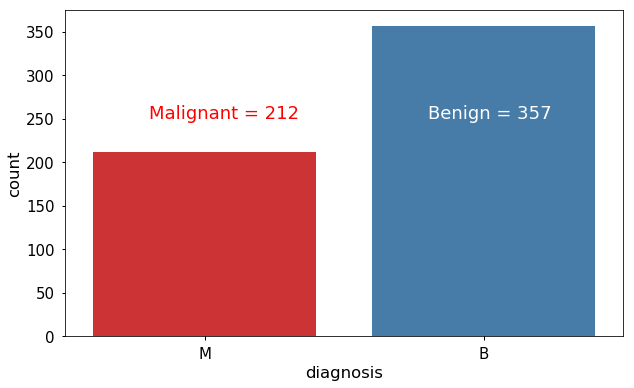

In [20]:
# The frequency of cancer stages
B, M = data0['diagnosis'].value_counts()
print('Number of Malignant : ', M)
print('Number of Benign: ', B)

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('diagnosis',data=data0, palette="Set1")
plt.annotate('Malignant = 212', xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='red')
plt.annotate('Benign = 357', xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');

The target variable (response), as shown in the bar chart above, has unbalanced data. In other words, classes are not represented equally. One way to deal with this issue is resampling. However, this tutorial will not address that problem.

In [17]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Ten features (predictor variables) were computed for each cell nucleus: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. In addition, mean, standard error (se), and largest (“worst”) mean of the were also registered for each feature.

Data are distributed in a wide range, therefore, features were standardized before their visualization, so they have a mean of ‘0’ and a standard deviation of ‘1’.

In [18]:
#data.columns or
data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Standardization of features
stdX = (features - features.mean()) / (features.std())              
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

<a id='p1'></a>
### Boxplot of features by diagnosis

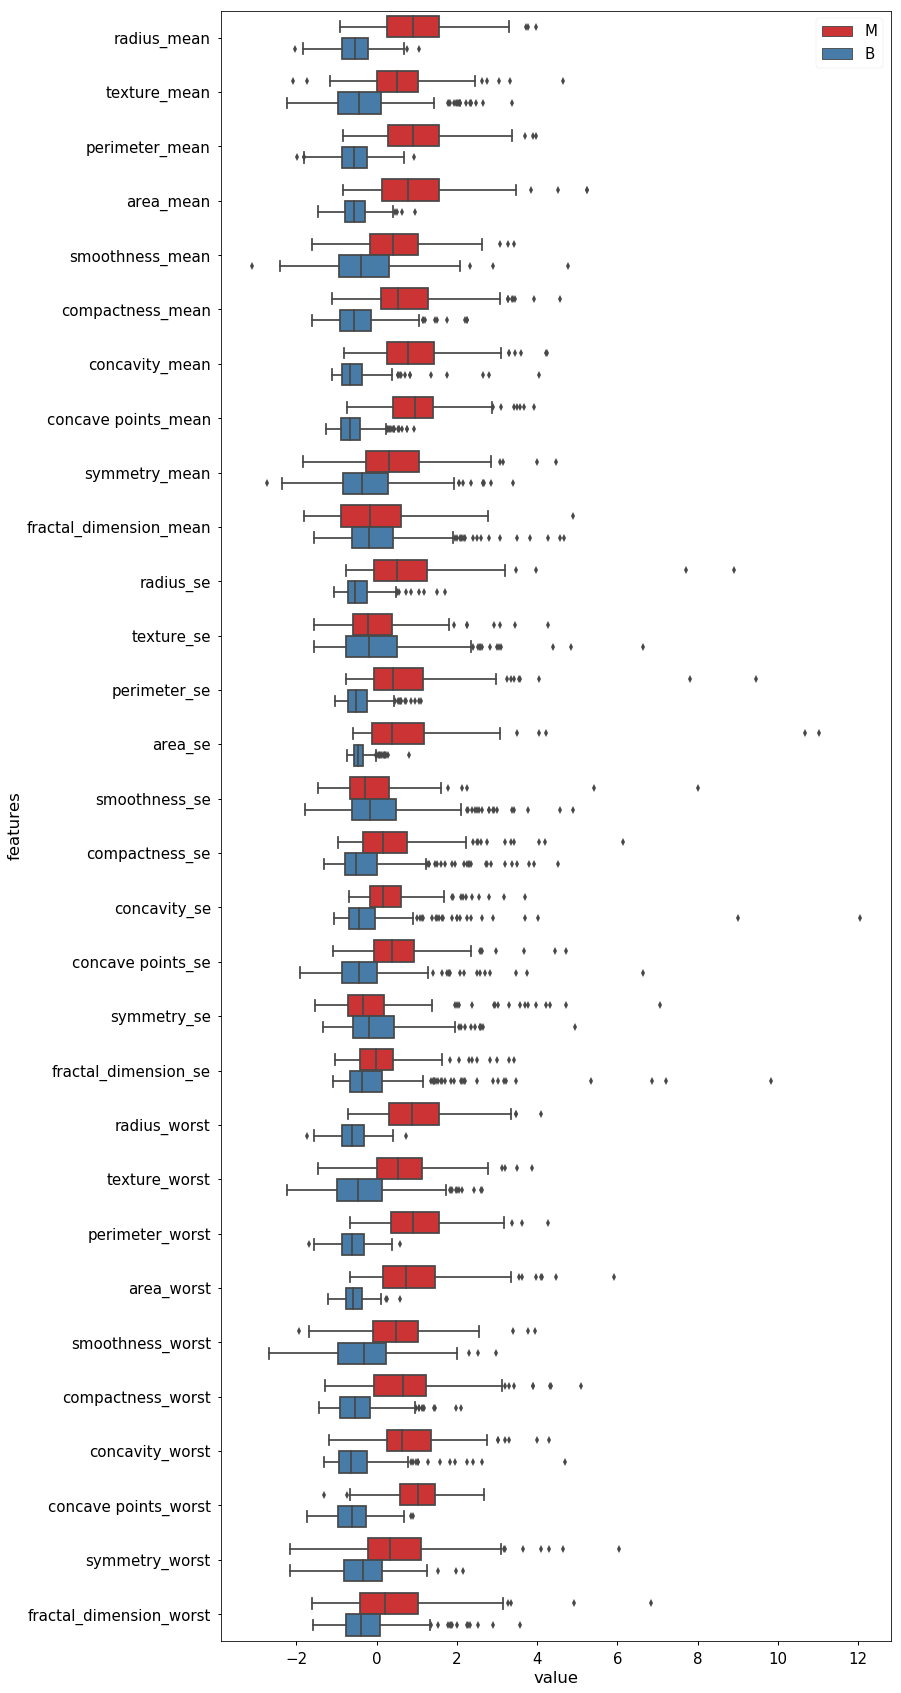

In [21]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data_st, palette='Set1')
plt.legend(loc='best');

From this plot it is possible to identify that some features are very similar, as for example, perimeter_mean and area_mean, and perimeter_se and area_se. Furthermore, we can also observe that some features have different measures when the tumor is malignant or benign. Examples of this are area_mean, radius_mean, and concavity_mean. On the other hand, in features such as fractal_dimension_mean and texture_se, the distribution of malignant and benign tumoers seems to be similar.

<a id='p2'></a>
### Violin plot of features by diagnosis

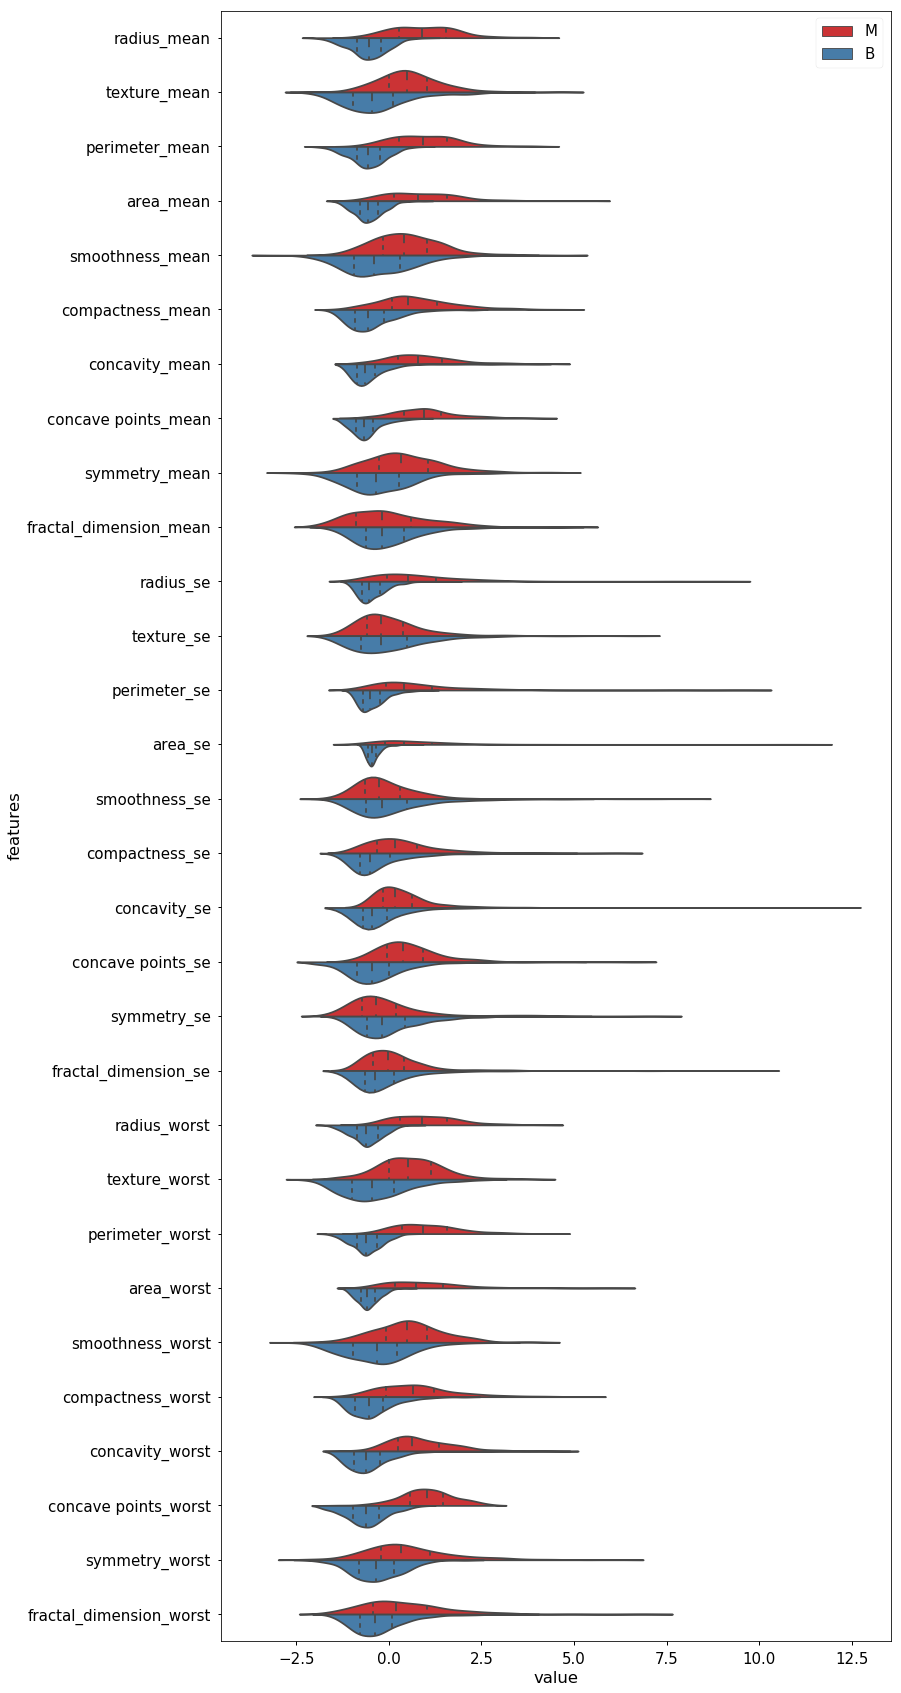

In [19]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_st,split=True, 
               inner="quart", palette='Set1')
plt.legend(loc='best');

<a id='corr'></a>
### Correlation

Looking at correlations matrix, defined via Pearson function. 

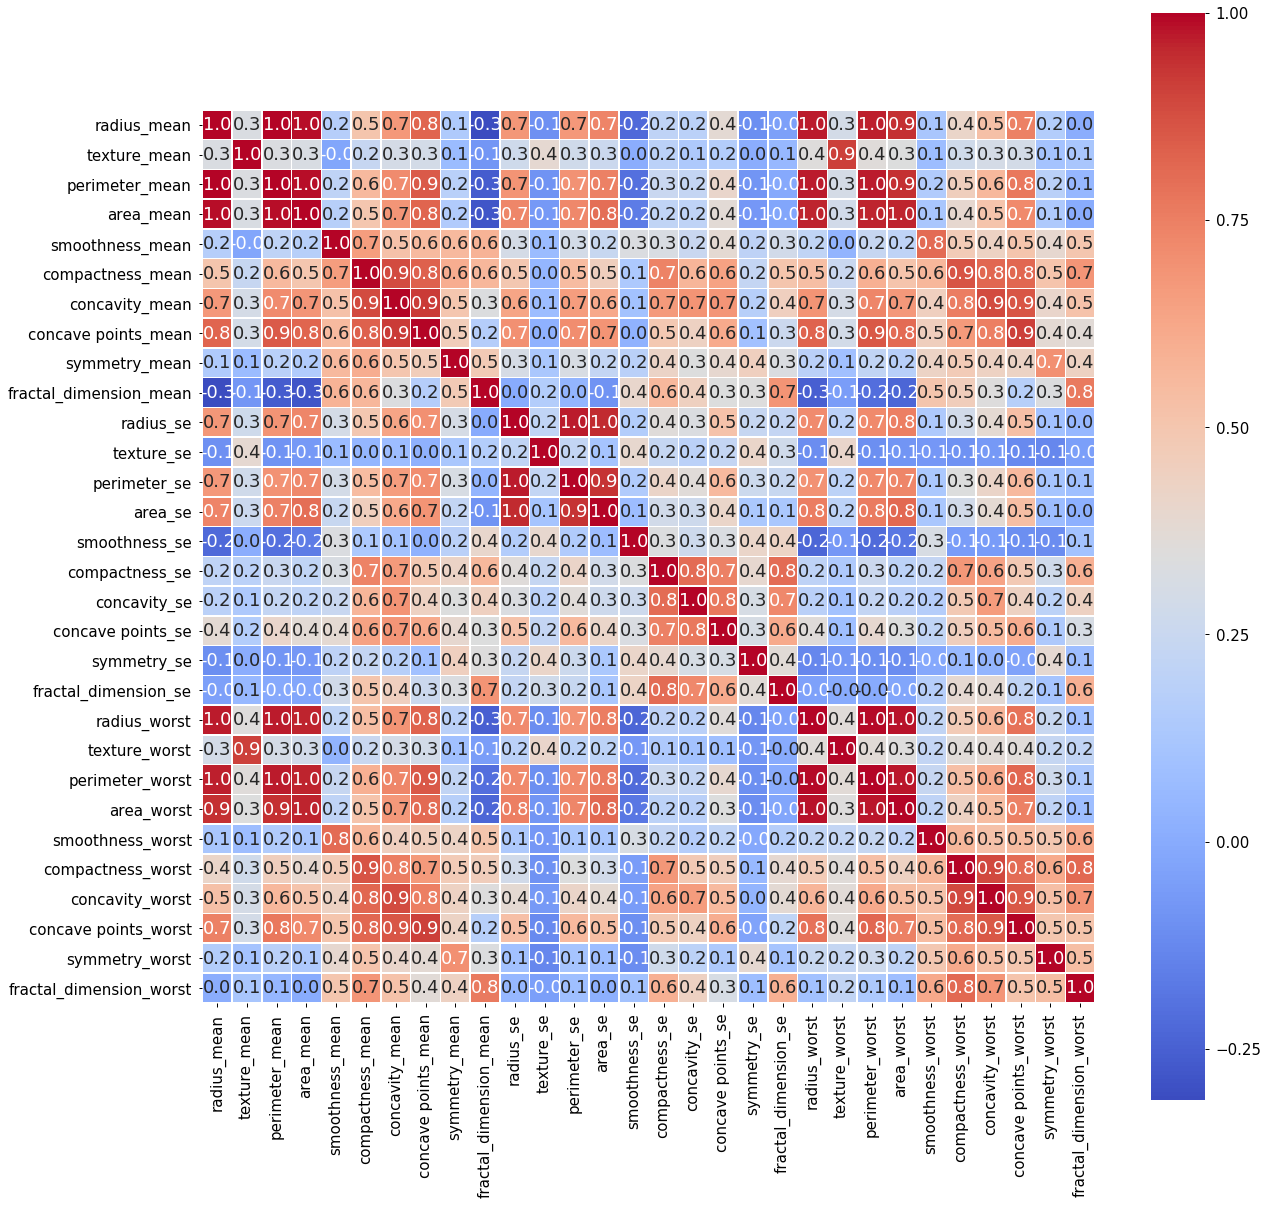

In [25]:
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

Finding un-correlated variables via Pearson correlation coefficient between two arrays

In [22]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for 'radius_mean', 'symmetry_mean'
r1 = pearson_r(data['radius_mean'], data['perimeter_mean'])
r2= pearson_r(data['radius_mean'], data['symmetry_mean'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(data.iloc[:,1], data.iloc[:,j])
        if abs(r) >= 0.80 and data.columns[j]  not in name_c:
                    name_c.append(data.columns[j]) 
print()
print('* Lenght of columns assuming r >=0.80:', len(name_c)) 
print('name_c =',name_c) 


* Lenght of columns assuming r >=0.80: 7
name_c = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']


In [23]:
name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(data.iloc[:,1], data.iloc[:,j])
        if abs(r) <= 0.40 and data.columns[j]  not in name_c:
                    name_c.append(data.columns[j])
                            
print('* Lenght of columns assuming r <=0.40:', len(name_c)) 
print('name_c =',name_c) 

* Lenght of columns assuming r <=0.40: 15
name_c = ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


**What do correlations mean?**<br>

Lets separately fit correlated and uncorrelated data via linear regression: 

Uncorrelated data are poentially more useful: discrimentory!


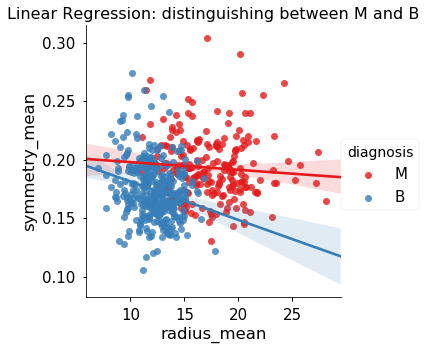

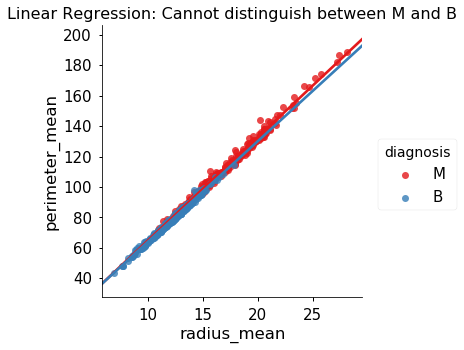

In [26]:
sns.lmplot(x='radius_mean', y= 'symmetry_mean', data = data0, hue ='diagnosis', 
           palette='Set1')
plt.title('Linear Regression: distinguishing between M and B', size=16)


sns.lmplot(x='radius_mean', y= 'perimeter_mean', data = data0, hue ='diagnosis', 
           palette='Set1')
plt.title('Linear Regression: Cannot distinguish between M and B', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

The bloxblot and swarm plots below show that malignant and benign tumors have almost the same measures of fractal_dimension_mean, while radius_mean provides more information for classification.

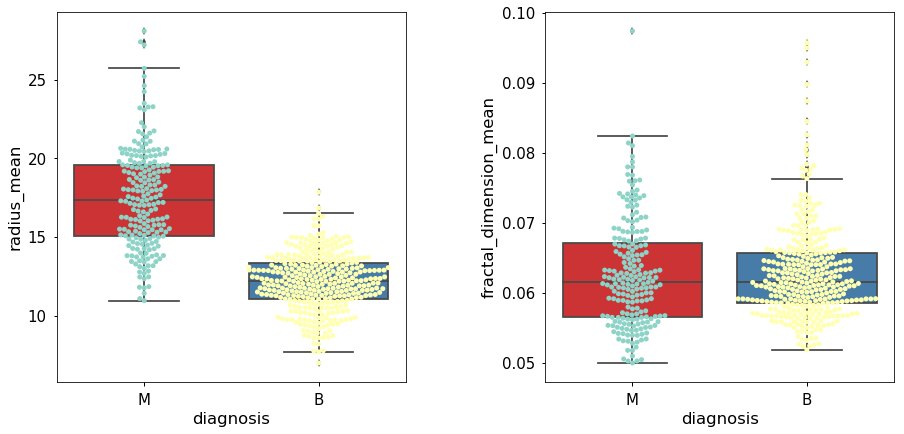

In [28]:
plt.figure(figsize=(15,15))
sns.set_context('notebook', font_scale=1.5)
plt.subplot(2, 2, 1)
sns.boxplot(y="radius_mean", x="diagnosis", data=data0, palette="Set1") 
sns.swarmplot(x="diagnosis", y="radius_mean",data=data0, palette="Set3", dodge=True)
plt.subplot(2, 2, 2)  
sns.boxplot(y="fractal_dimension_mean", x="diagnosis", data=data0, palette="Set1")
sns.swarmplot(x="diagnosis", y="fractal_dimension_mean",data=data0, palette="Set3",
              dodge=True)
plt.subplots_adjust(wspace=0.4); 

<a id='stat'></a>
## Statistical inference

To further investigate the properties of features, we constructed the empirical cumulative distribution of features (ECDF), fractal_dimension_mean and radius_mean. 

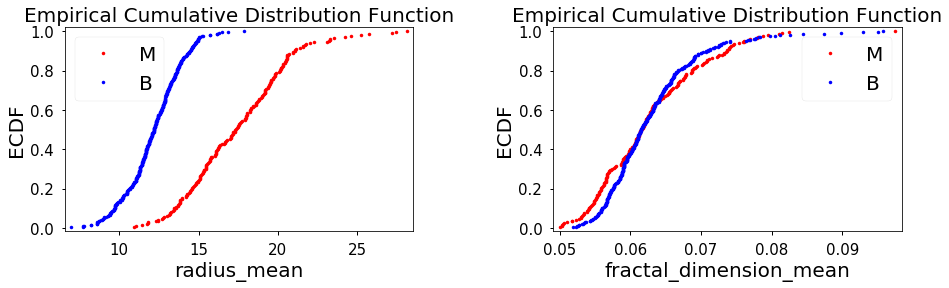

In [79]:
# CDF function
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, n+1)/n
    return x, y 

data2 = data0['radius_mean']
Malignant = data2[data0['diagnosis']=='M']
Benign = data2[data0['diagnosis']=='B']

x1, y1 = ecdf(Malignant)
x2, y2 = ecdf(Benign)

data3 = data0['fractal_dimension_mean']
Malignant_f = data3[data0['diagnosis']=='M']
Benign_f = data3[data0['diagnosis']=='B']

x3, y3 = ecdf(Malignant_f)
x4, y4 = ecdf(Benign_f)

plt.figure(figsize=(15,15))
#plt.close('all')
plt.subplot(2, 2,  1)
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.plot(x1, y1, marker='.',linestyle='none', color='red', label='M')
plt.plot(x2, y2, marker='.',linestyle='none', color ='blue', label='B')
plt.margins(0.02)
plt.xlabel('radius_mean', size=20)
plt.ylabel('ECDF', size=20)
plt.title('Empirical Cumulative Distribution Function', size=20)
plt.legend(prop={'size':20})
#plt.show()
plt.subplot(2, 2,  2)
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.plot(x3, y3, marker='.',linestyle='none', color='red', label='M')
plt.plot(x4, y4, marker='.',linestyle='none', color ='blue', label='B')
plt.margins(0.02)
plt.xlabel('fractal_dimension_mean', size=20)
plt.ylabel('ECDF', size=20)
plt.title('Empirical Cumulative Distribution Function', size=20)
plt.legend(prop={'size':20});

<a id='t'></a>
### Hypothesis testing

Some necessary functions were created in order to do hypothesis analysis.

In [77]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates



def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

<center>*H0: There is no difference of average radius_mean between malignant and benign cancer*</center>

In [80]:
diff_of_means(Malignant, Benign)

5.316306379155439

In [81]:
# Computing difference of mean overall acore
empirical_diff_means = diff_of_means(Malignant, Benign)

# Drawing 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Malignant, Benign,diff_of_means, size=10000)

# Computing p-value: p
p = np.sum(perm_replicates >= empirical_diff_means)/ len(perm_replicates) 

print('p-value =', p)

p-value = 0.0


We failed to reject the null hypothesis. The p-value tells us that there is 0.0% chance that we would get the difference of means observed, if Malignant and Benign radius_mean were exactly the same.

<a id='fs'></a>
## Feature Selection
Let's check the relative importance of features.

                         ExtraTree  Random-Forest
area_worst                0.146742       0.146248
concave points_mean       0.099472       0.143565
concave points_worst      0.097745       0.120375
perimeter_mean            0.095392       0.022079
radius_worst              0.078134       0.092591
radius_mean               0.078110       0.048220
concavity_worst           0.077008       0.046415
compactness_worst         0.056838       0.008227
perimeter_worst           0.048554       0.085508
concavity_mean            0.027010       0.050788
compactness_mean          0.019218       0.014120
texture_mean              0.016459       0.011988
area_se                   0.013592       0.023087
fractal_dimension_worst   0.012442       0.011493
smoothness_worst          0.012379       0.010762
symmetry_mean             0.012377       0.002633
texture_worst             0.012044       0.020359
area_mean                 0.011713       0.071475
radius_se                 0.010851       0.005545


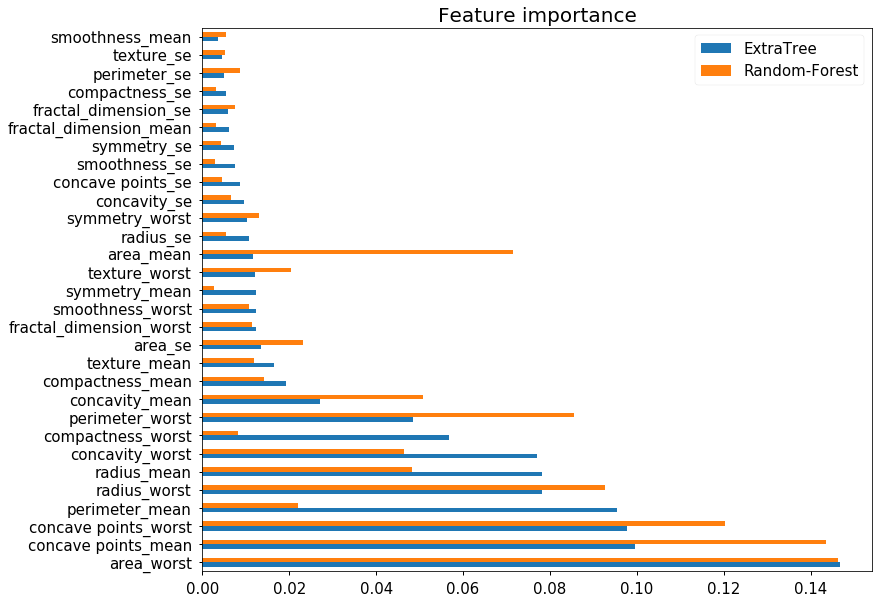

In [87]:
#RandomForest
impor_Forest=Ran.feature_importances_
indices_1 = np.argsort(impor_Forest)[::-1]

#ExtraTree
impor_Extra_tree=tree_2.feature_importances_
indices_2= np.argsort(impor_Extra_tree)[::-1]

featimp_1 = pd.Series(impor_Forest, index=data.columns[1:]).sort_values(ascending=False)
featimp_2 = pd.Series(impor_Extra_tree, index=data.columns[1:]).sort_values(ascending=False)

Table_impor= pd.DataFrame({'ExtraTree': featimp_2,'Random-Forest': featimp_1})
Table_impor=Table_impor.sort_values('ExtraTree', ascending=False)
print(Table_impor)
print()
print('The six most important features:')
print(featimp_1[0:6])

sns.set_context('notebook', font_scale=1.5)
Table_impor.plot(kind='barh', figsize=(12,10))
plt.title('Feature importance', size=20);

<a id='ml'></a>
## Machine Learning: Classification models

The classification models used for this analysis are: k-nearest neighbors (k-NN), Logistic Regression, ExtraTree-decision, Random Forest Classifier and Adaptive Boosting Classifier (AdaBoost).

<a id='sp'></a>
### Spliting the data into train and test sets

Before modelling, the original data was split into train (70%) and test (30%).

In [31]:
# Split the data into train (0.7) and test (0.3)

## all data without dropping those with correlations
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, 
                                                    stratify=y)

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<a id='knn'></a>
### k-nearest neighbors (K-NN) 

A k-Nearest Neighbors (k-NN) classifier with 3 neighbors (k) was created, and fitted to the training data.

In [39]:
# Creating a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print('Accuracy KNN(1): ', knn.score(X_test, y_test))

Accuracy KNN(1):  0.9298245614035088


#### Learning curves: over/underfitting

The learning curves for k-NN model were constructed, varying the number of neighbors. The results can be seen bellow.

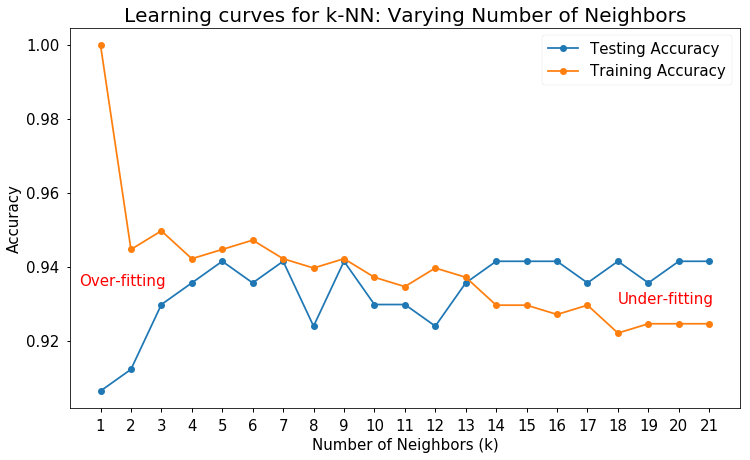

In [33]:
neighbors = np.arange(1, 22)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for k-NN: Varying Number of Neighbors', size=20)
plt.plot(neighbors, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Number of Neighbors (k)', size=15)
plt.ylabel('Accuracy', size=15)
plt.annotate('Over-fitting', xy=(0.5, 0.94), xytext=(0.3, 0.935), size=15, color='red')
plt.annotate('Under-fitting', xy=(0.5, 0.94), xytext=(18, 0.93), size=15, color='red')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0));

* <font color='blue'>It is seen from above over-fitting (low k) and under-fitting (high k).  </font>

* We can find the optimized values of k via GridSearchCV in scikit-learn:

#### Normalization issue

From the plot below, and as it was shown in the EDA, it is possible to see that features are in different scales.

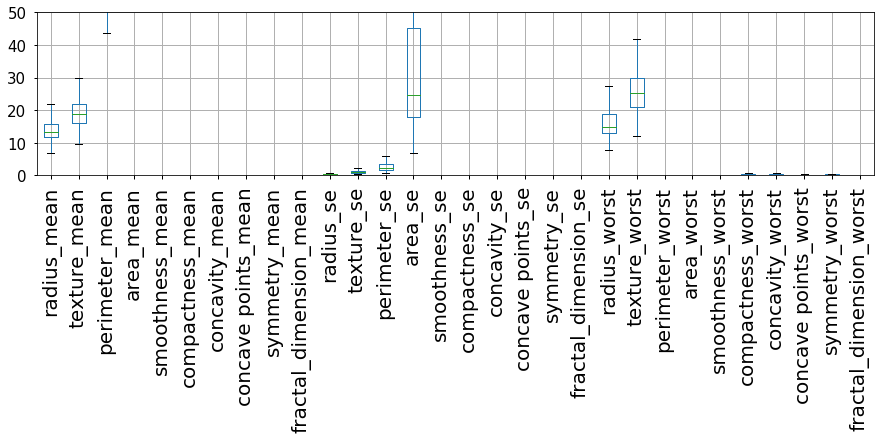

In [37]:
## data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= data.drop('diagnosis', axis=1).boxplot(data.columns.name, rot=90)
plt.xticks( size=20)
ax.set_ylim([0,50]);

#### K-NN Learning Pipeline (including scaling)
A second k-NN model was created using a standardized data.

{'knn__n_neighbors': 3}

             precision    recall  f1-score   support

          B       0.95      0.99      0.97       107
          M       0.98      0.91      0.94        64

avg / total       0.96      0.96      0.96       171

Best score is: 0.964824120603015


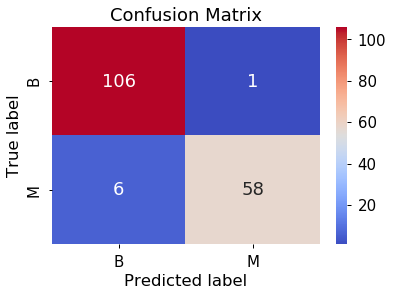

In [74]:
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors' : np.arange(1, 50)}


k_nn = GridSearchCV(pipeline, param_grid=parameters)
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict(X_test)

print(k_nn.best_params_)
print()
print(classification_report(y_test, y_pred))
print("Best score is: {}".format(k_nn.best_score_))

ConfMatrix = confusion_matrix(y_test,k_nn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="coolwarm", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [57]:
cv_knn = cross_val_score(k_nn, X, y, cv=5, scoring='accuracy')
print('Average 5-Fold CV Score: ', cv_knn.mean(), ', Standard deviation: ', cv_knn.std())

Average 5-Fold CV Score:  0.885971527510581 , Standard deviation:  0.030049537417946796


<a id='lr'></a>
### Logistic Regression 

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}

             precision    recall  f1-score   support

          B       0.98      0.99      0.99       107
          M       0.98      0.97      0.98        64

avg / total       0.98      0.98      0.98       171

Best score is 0.9597989949748744


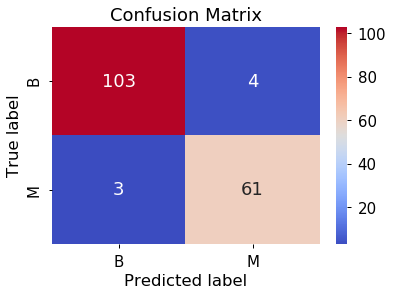

In [73]:
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid , cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print()
print(classification_report(y_test, y_pred))
print("Best score is {}".format(logreg_cv.best_score_))

ConfMatrix = confusion_matrix(y_test,logreg_cv.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="coolwarm", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [56]:
cv_logreg = cross_val_score(logreg_cv, X, y, cv=5, scoring='accuracy')
print('Average 5-Fold CV Score: ', cv_logreg.mean(), ', Standard deviation: ', cv_logreg.std())

Average 5-Fold CV Score:  0.8859407464409388 , Standard deviation:  0.027555522315405114


<a id='tree'></a>
### Extra Tree Classifier

Tuned Extra Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}

             precision    recall  f1-score   support

          B       0.98      0.99      0.99       107
          M       0.98      0.97      0.98        64

avg / total       0.98      0.98      0.98       171

Best score is 0.9547738693467337


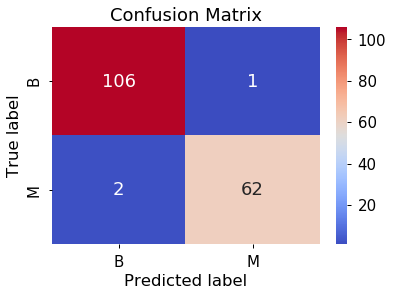

In [72]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
#tree = DecisionTreeClassifier() # ExtraTrees is better here. 
tree= ExtraTreesClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)
y_pred = tree_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Extra Tree Parameters: {}".format(tree_cv.best_params_))
print()
print(classification_report(y_test, y_pred))
print("Best score is {}".format(tree_cv.best_score_))
# metrics.accuracy_score(y_pred,y_test) # the same as above

ConfMatrix = confusion_matrix(y_test,tree_cv.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="coolwarm", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [66]:
cv_tree = cross_val_score(tree_cv, X, y, cv=5, scoring='accuracy')
print('Average 5-Fold CV Score: ', cv_tree.mean(), ', Standard deviation: ', cv_tree.std())

Average 5-Fold CV Score:  0.8702577914582532 , Standard deviation:  0.03747062684911927


<a id='rf'></a>
### Random Forest Classifier

Accuracy: 0.9766081871345029

             precision    recall  f1-score   support

          B       0.97      0.99      0.98       107
          M       0.98      0.95      0.97        64

avg / total       0.98      0.98      0.98       171


Average 5-Fold CV Score: 0.8842016160061561 , Standard deviation: 0.024059024349020786


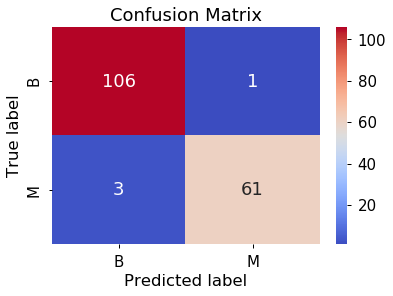

In [71]:
Ran = RandomForestClassifier(n_estimators=50)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)), 
      ", Standard deviation: {}".format(np.std(cv_scores)))

ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="coolwarm", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");


### Extra Tree Classifier (reduced features)

Extra-Tree score: 0.9766081871345029
Shape of original data: (398, 30)

Shape of data with most important features: (398, 9)

             precision    recall  f1-score   support

          B       0.95      0.99      0.97       107
          M       0.98      0.91      0.94        64

avg / total       0.96      0.96      0.96       171



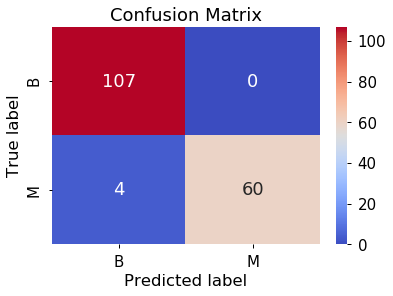

In [75]:
tree_2= ExtraTreesClassifier()
tree_2.fit(X_train, y_train)
print('Extra-Tree score:',tree_2.score(X_test, y_test))
print('Shape of original data:', X_train.shape)
print()
tree_2.feature_importances_
model_reduced = SelectFromModel(tree_2, prefit=True)
X_reduced = model_reduced.transform(X_train)
print('Shape of data with most important features:', X_reduced.shape)
print()
print(classification_report(y_test, y_pred))
print()

ConfMatrix = confusion_matrix(y_test,tree_2.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="coolwarm", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [76]:
cv_tree2 = cross_val_score(logreg_cv, X, y, cv=5, scoring='accuracy')
print("Average 5-Fold CV Score: {}".format(np.mean(cv_tree)), 
      "Standard deviation: {}".format(np.std(cv_tree)));

Average 5-Fold CV Score: 0.8702577914582532 Standard deviation: 0.03747062684911927


<a id='sum'></a>
## Summary of models performance

In [85]:
Final_results= { 'Accuracy': [0.9648,
                           0.9598,
                           0.9548,
                           0.9766], 
                'F1-score': [0.96,
                           0.98,
                           0.98,
                           0.98],
                'False Negatives': [1,
                           4,
                           1,
                           1],
               'Models': ["K-NN", 'Logistic Regression','ExtraTree-decision',
                          'Random-Forest']}   
F=pd.DataFrame(Final_results, index=[1,2,3,4] )
print(F)

   Accuracy  F1-score  False Negatives               Models
1    0.9648      0.96                1                 K-NN
2    0.9598      0.98                4  Logistic Regression
3    0.9548      0.98                1   ExtraTree-decision
4    0.9766      0.98                1        Random-Forest
